# Importando Bibliotecas

In [162]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

# Importando Base de Dados

In [177]:
dados_clientes =pd.read_excel('dataset.xlsx', index_col=0)

In [178]:
# Renomeando as colunas do conjunto de dados

dados_clientes.rename({'age':'Idade','average':'Media','job':'Trabalho','marital status':\
                       'Estado civil','family income':'Renda fam','family member':'Membros fam','lost family':'Perda fam','special disease':\
                      'Doença espec','belive in abilities':'Crença em Hab','plenty friends':\
                       'Muitos amigos',},axis=1, inplace=True)

In [179]:
dados_clientes

,Idade,enterance,Media,Estado civil,Trabalho,Renda fam,Membros fam,Perda fam,Doença espec,parents relationship,...,Crença em Hab,Muitos amigos,break in love,bankrupcy,political concern,art,smoke,lonely,worring about job,depression
number,,,,,,,,,,,,,,,,,,,,,
1,22,88,mediume,single,no,600000,4,no,no,kind,...,yes,yes,yes,no,yes,yes,no,yes,yes,no
2,20,89,mediume,single,yes,2000000,2,no,no,kind,...,yes,yes,yes,yes,no,yes,yes,no,yes,no
3,20,89,mediume,single,yes,3000000,6,no,no,kind,...,yes,yes,no,no,yes,yes,yes,no,yes,no
4,22,87,mediume,single,yes,1000000,4,yes,no,bad,...,yes,no,no,no,yes,yes,no,yes,yes,yes
5,23,87,mediume,married,no,1000000,2,no,no,kind,...,no,yes,yes,yes,yes,yes,no,yes,yes,a little
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23,88,mediume,single,no,2000000,4,no,no,Divorce,...,yes,yes,yes,no,no,no,yes,yes,no,no
92,23,89,low,single,no,2000000,3,no,no,kind,...,no,yes,no,no,no,no,yes,no,yes,no
93,19,90,mediume,single,no,1000000,5,no,no,bad,...,no,yes,yes,no,yes,no,no,yes,yes,a little


In [187]:
# Número de linhas e colunas do conjunto de dados
dados_clientes.shape

(95, 19)

In [188]:
# Renomeando atributos do conjunto de dados
dados_clientes.rename({'number':'ID','bankrupcy':'Falencia','political concern':'Preocupação politica',\
                       'smoke':'Fumante','religion':'Religião','lonely':'Solitario','sport':'Esporte','parents relationship':'Relac pais','worring about job':'Preocupação com emprego',\
                       'depression':'Depressão'},axis=1, inplace=True)

In [185]:
# Colunas deletadas

dados_clientes.drop('enterance',axis=1,inplace=True)
#dados_clientes.drop('art',axis=1,inplace=True)
#dados_clientes.drop('break in love',axis=1, inplace=True)
#dados_clientes.drop('activity',axis=1,inplace=True)
#dados_clientes.drop('Media',axis=1,inplace=True)
#dados_clientes.drop('interested in major',axis=1,inplace=True)

In [186]:
dados_clientes

,Idade,Estado civil,Trabalho,Renda fam,Membros fam,Perda fam,Doença espec,Relac pais,Religião,Esporte,Crença em Hab,Muitos amigos,Falencia,Preocupação politica,art,Fumante,lonely,Preocupação com emprego,Depressão
number,,,,,,,,,,,,,,,,,,,
1,22,Solteiro(a),Não,600000,4,Não,Não,bom,Não,Sim,Sim,Sim,Não,Sim,yes,Não,yes,Sim,Não
2,20,Solteiro(a),Sim,2000000,2,Não,Não,bom,Não,Sim,Sim,Sim,Sim,Não,yes,Sim,no,Sim,Não
3,20,Solteiro(a),Sim,3000000,6,Não,Não,bom,Sim,Sim,Sim,Sim,Não,Sim,yes,Sim,no,Sim,Não
4,22,Solteiro(a),Sim,1000000,4,Sim,Não,ruim,Sim,Sim,Sim,Não,Não,Sim,yes,Não,yes,Sim,Sim
5,23,Casado(a),Não,1000000,2,Não,Não,bom,Sim,Não,Não,Sim,Sim,Sim,yes,Não,yes,Sim,Um pouco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23,Solteiro(a),Não,2000000,4,Não,Não,divorciados,Sim,Sim,Sim,Sim,Não,Não,no,Sim,yes,Não,Não
92,23,Solteiro(a),Não,2000000,3,Não,Não,bom,Sim,Sim,Não,Sim,Não,Não,no,Sim,no,Sim,Não
93,19,Solteiro(a),Não,1000000,5,Não,Não,ruim,Sim,Não,Não,Sim,Não,Sim,no,Não,yes,Sim,Um pouco


In [182]:
# Renomeando todos os atributos das colunas

dados_clientes['Estado civil'].replace(['single','married'],['Solteiro(a)','Casado(a)'],inplace=True)
dados_clientes['Perda fam'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Doença espec'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Religião'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Relac pais'].replace(['Divorce','kind','bad'],['divorciados','bom','ruim'],inplace=True)
dados_clientes['Esporte'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Crença em Hab'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Muitos amigos'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Falencia'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Preocupação politica'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Fumante'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Preocupação com emprego'].replace(['no','yes'],['Não','Sim'],inplace=True)
dados_clientes['Depressão'].replace(['no','yes','a little'],['Não','Sim','Um pouco'],inplace=True)
dados_clientes['Trabalho'].replace(['no','yes'],['Não','Sim'],inplace=True)


In [155]:
dados_clientes

,Idade,enterance,Media,Estado civil,Trabalho,Renda fam,Membros fam,Perda fam,Doença espec,Relac pais,...,Crença em Hab,Muitos amigos,break in love,Falencia,Preocupação politica,art,Fumante,lonely,Preocupação com emprego,Depressão
number,,,,,,,,,,,,,,,,,,,,,
1,22,88,mediume,Solteiro(a),Não,600000,4,Não,Não,bom,...,Sim,Sim,yes,Não,Sim,yes,Não,yes,Sim,Não
2,20,89,mediume,Solteiro(a),Sim,2000000,2,Não,Não,bom,...,Sim,Sim,yes,Sim,Não,yes,Sim,no,Sim,Não
3,20,89,mediume,Solteiro(a),Sim,3000000,6,Não,Não,bom,...,Sim,Sim,no,Não,Sim,yes,Sim,no,Sim,Não
4,22,87,mediume,Solteiro(a),Sim,1000000,4,Sim,Não,ruim,...,Sim,Não,no,Não,Sim,yes,Não,yes,Sim,Sim
5,23,87,mediume,Casado(a),Não,1000000,2,Não,Não,bom,...,Não,Sim,yes,Sim,Sim,yes,Não,yes,Sim,Um pouco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23,88,mediume,Solteiro(a),Não,2000000,4,Não,Não,divorciados,...,Sim,Sim,yes,Não,Não,no,Sim,yes,Não,Não
92,23,89,low,Solteiro(a),Não,2000000,3,Não,Não,bom,...,Não,Sim,no,Não,Não,no,Sim,no,Sim,Não
93,19,90,mediume,Solteiro(a),Não,1000000,5,Não,Não,ruim,...,Não,Sim,yes,Não,Sim,no,Não,yes,Sim,Um pouco


# Transformando atributos categóricos em numéricos

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer (transformers = [('encoder',OneHotEncoder(),[2,3,6,7,8,9,13,17])]\
                      ,remainder = 'passthrough')
dados_clientes = np.array(ct.fit_transform(dados_clientes))

In [157]:
dados_clientes

array([[0.0, 0.0, 1.0, ..., 'yes', 'Sim', 'Não'],
       [0.0, 0.0, 1.0, ..., 'no', 'Sim', 'Não'],
       [0.0, 0.0, 1.0, ..., 'no', 'Sim', 'Não'],
       ...,
       [0.0, 0.0, 1.0, ..., 'yes', 'Sim', 'Um pouco'],
       [1.0, 0.0, 0.0, ..., 'no', 'Não', 'Não'],
       [0.0, 0.0, 1.0, ..., 'yes', 'Sim', 'Um pouco']], dtype=object)

# Visualização dos dados

In [169]:
plt.style.use('fivethirtyeight')

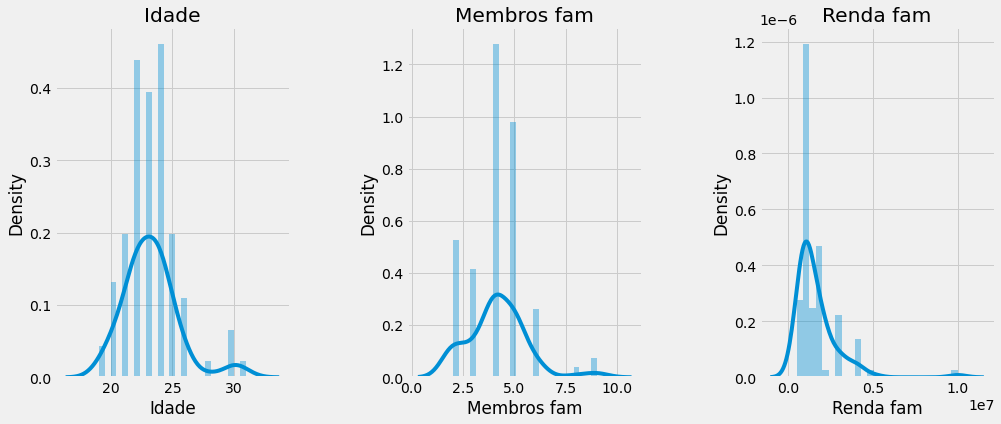

In [170]:
# Analisando Idade versus números de membros da família versus Renda familiar
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Idade','Membros fam' ,'Renda fam' ]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dados_clientes[x], bins = 25)
    plt.title('{}'.format(x))
plt.show()

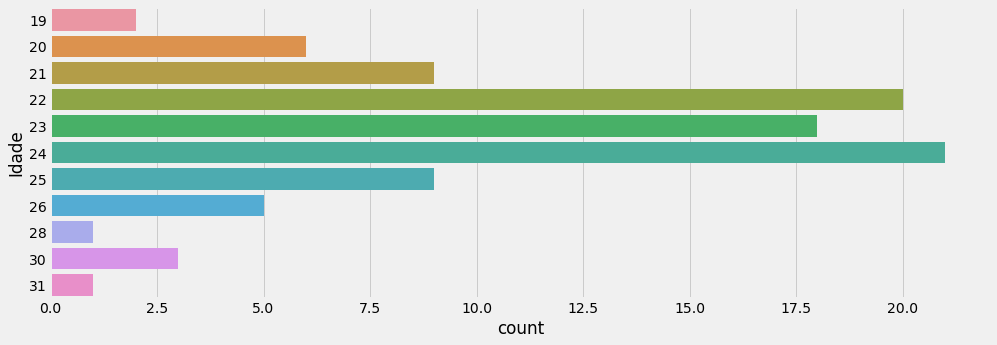

In [171]:
# Contagem de amostras de registros por idade
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Idade' , data= dados_clientes )
plt.show()

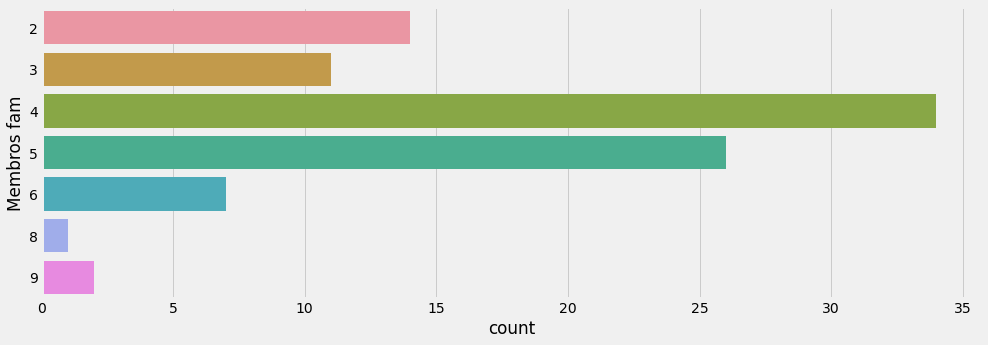

In [172]:
# Contagem de amostras de registros por número de membros da família 
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Membros fam' , data= dados_clientes )
plt.show()

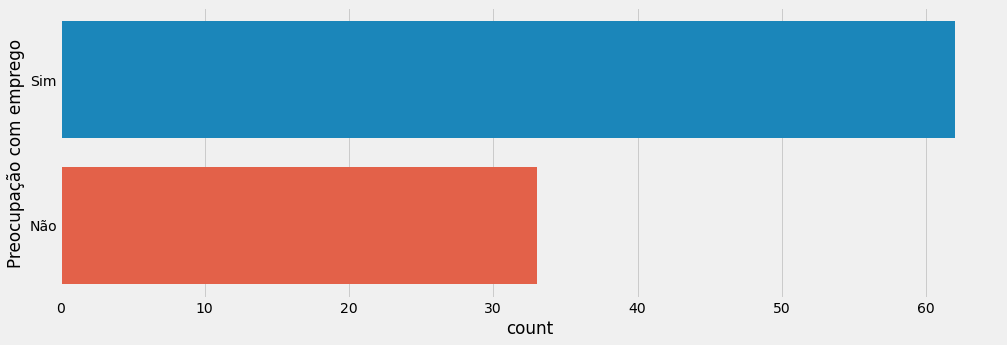

In [173]:
# Contagem de amostras de registros por pessoas que estão preocupadas com emprego ou não
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Preocupação com emprego' , data= dados_clientes )
plt.show()

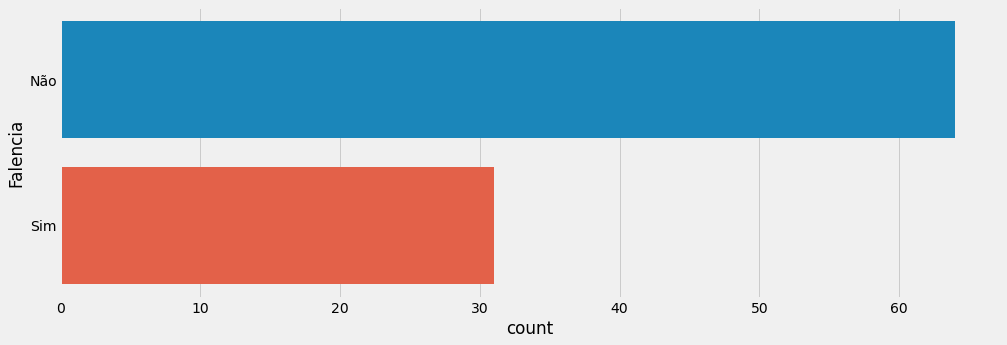

In [174]:
# Contagem de amostras de registros por quantidade de pessoas que registraram falência
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Falencia' , data= dados_clientes )
plt.show()

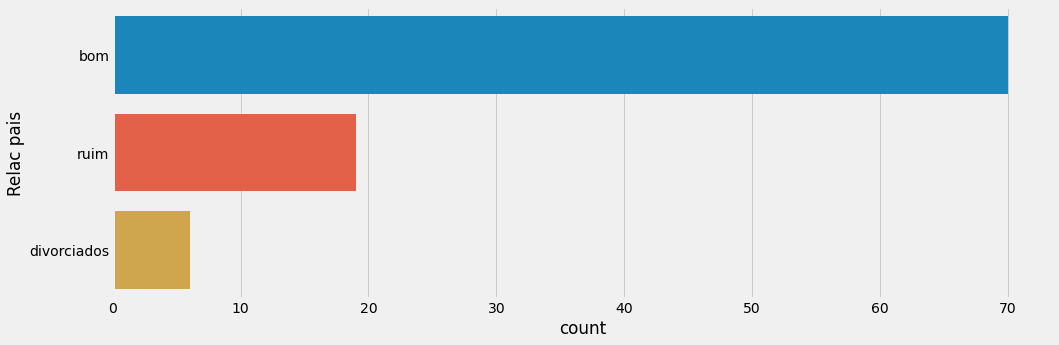

In [175]:
# Contagem de amostras de registros por estatística do relacionamento dos pais
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Relac pais' , data= dados_clientes )
plt.show()

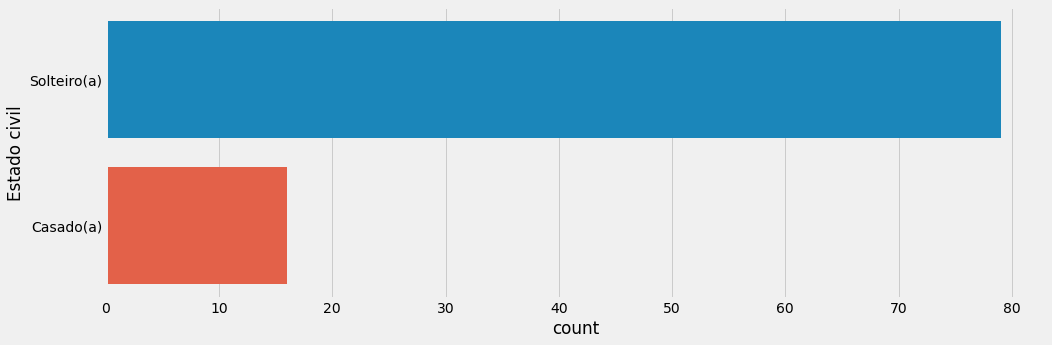

In [176]:
# Contagem de amostras de registros relacionados ao estado civil
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Estado civil' , data= dados_clientes )
plt.show()